# Import

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
# Machine leanrnign algo
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# data manipulation
import pandas as pd
import numpy as np

#visualize
import matplotlib.pyplot as plt
import seaborn as sns


#
import os

plt.rcParams['figure.figsize'] = (15,6)

# Import data

In [6]:
os.listdir('../data')

['test.csv', 'train.csv', 'sample_submission.csv']

In [22]:
train = pd.read_csv('../data/train.csv')

In [8]:
test = pd.read_csv('../data/test.csv')

In [9]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
print('The dataset is really skewed')
train.TARGET.value_counts()/train.TARGET.count()

The dataset is really skewed


0    0.960431
1    0.039569
Name: TARGET, dtype: float64

# Helper functions

In [11]:
def split(x,n=None):
    if n==None:
        n=int(len(x)*.7)
    
    return x[:n],x[n:]

# Provide a place holder for train
def split_data(df=train):
    y = df['TARGET'].copy()
    x = df.drop('TARGET',axis=1)
    global X_train,X_valid,y_train,y_valid
    
    X_train ,X_valid = split(x)
    y_train ,y_valid = split(y)

In [20]:
def print_score(clf):
    train_pred = clf.predict_proba(X_train)[:,1]
    valid_pred = clf.predict_proba(X_valid)[:,1]
    if train_pred.sum()==0:
        print("All prediciton on train is 0")
        
    if valid_pred.sum()==0:
        print("All prediciton on valid is 0")
    print('ROC on training set : ',roc_auc_score(y_train,train_pred))
    print('ROC on training set : ',roc_auc_score(y_valid,valid_pred))
    
def base_model():
    global m
    m = RFC(n_estimators=30, min_samples_leaf=5, n_jobs=-1, oob_score=True)
    m.fit(X_train,y_train)
    print_score(m)
 

# Slight feature engineering

## Remove constant columns

In [14]:
count = 0
for col in train.columns:
    if train[col].std() == 0:
        count+=1
        train.drop(col,axis=1,inplace=True)
print(f'{count} columns removed')

34 columns removed


# Base line

In [15]:
split_data()

In [21]:
base_model()

ROC on training set :  0.9281575580731299
ROC on training set :  0.8242309688100594


In [18]:
len(X_train.columns)

370

Model has been overfitt pretty bad, Indeed on the valid set it predict all the outcome = 0


In [43]:
def fi(m=m):
    return pd.DataFrame({'cols':X_train.columns,'imps':m.feature_importances_}).sort_values(by='imps',ascending=False)

def plot_fi(n=30):
    global fi_df
    fi_df = fi()[:n]
    return fi_df.plot('cols','imps','barh')

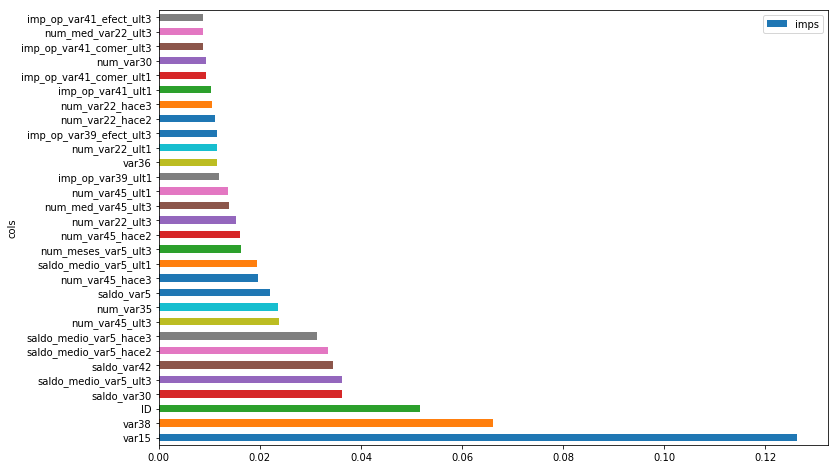

In [129]:
plot_fi()

In [62]:
y_valid_predict.sum(),y_valid.sum()

(1, 660)

Because of the result is bad so we can't really trust this feature important

In [150]:
fi_cols = fi_df.cols.values

array(['var15', 'var38', 'ID', 'saldo_var30', 'saldo_medio_var5_ult3',
       'saldo_var42', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'num_var45_ult3', 'num_var35', 'saldo_var5', 'num_var45_hace3',
       'saldo_medio_var5_ult1', 'num_meses_var5_ult3', 'num_var45_hace2',
       'num_var22_ult3', 'num_med_var45_ult3', 'num_var45_ult1',
       'imp_op_var39_ult1', 'var36', 'num_var22_ult1',
       'imp_op_var39_efect_ult3', 'num_var22_hace2', 'num_var22_hace3',
       'imp_op_var41_ult1', 'imp_op_var41_comer_ult1', 'num_var30',
       'imp_op_var41_comer_ult3', 'num_med_var22_ult3',
       'imp_op_var41_efect_ult3'], dtype=object)

In [67]:
roc_auc_score([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])

0.46875

In [68]:
roc_auc_score(y_valid_predict, m.predict(X_valid))

1.0

# Data Walkthrough

## Basic info

In [166]:
train.shape

(76020, 371)

In [25]:
print('The dataset is really skewed')
(train.TARGET.value_counts()/train.TARGET.count())*100

The dataset is really skewed


0    96.043147
1     3.956853
Name: TARGET, dtype: float64

In [103]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [26]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [29]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

There are a huge number of columns

In [39]:
train.isnull().sum().sum()

0

The data is flawless

## Var 15
This var seems like represent age

Text(0.5, 1.0, 'Var15 distribution')

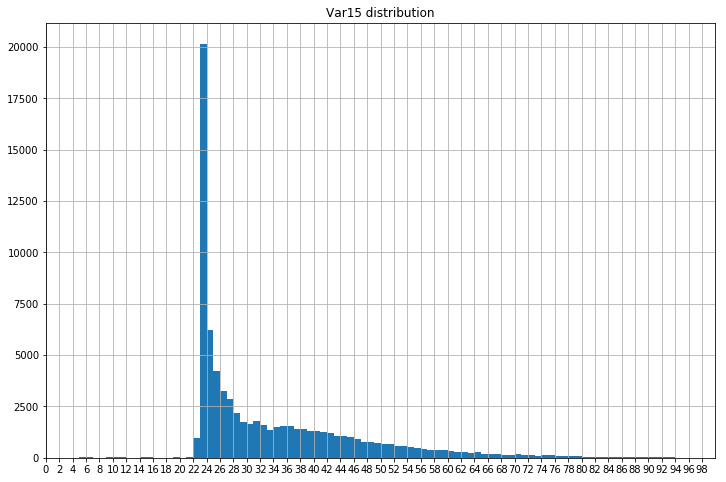

In [62]:
train.var15.hist(bins=100)
plt.xticks(range(0,100,2))
plt.xlim(0,100)
plt.title('Var15 distribution')

Very high number of user at 23
What does this represent ? How it effects the TARGET

In [76]:
print('The Satisfying distribution with var15 = 23 customers')
(train[train.var15==23].TARGET.value_counts()/train[train.var15==23].TARGET.count())*100

The Satisfying distribution with var15 = 23 customers


0    99.256321
1     0.743679
Name: TARGET, dtype: float64

There is a little bit higher of satisfy customer with var15=23 ( Was 0.3%)

/Users/macbook/miniconda3/envs/dev/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


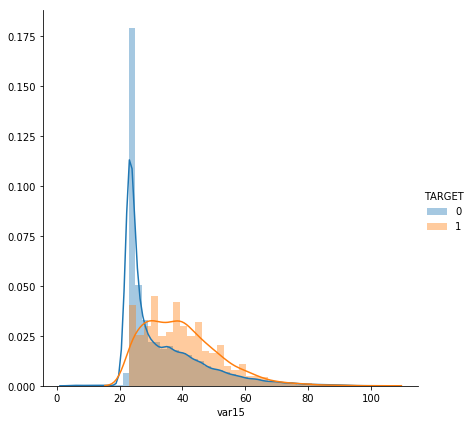

In [120]:
sns.FacetGrid(train, hue='TARGET',size=6).map(sns.distplot,'var15').add_legend()

The plot below is the same

In [ ]:
sns.kdeplot()

In [91]:
sns.lineplot(x='var15',y='count',hue='TARGET',data=train,log=True)

ValueError: Could not interpret input 'count'

In [101]:
sns.distplot('var15',hue='TARGET',data=train)

TypeError: distplot() got an unexpected keyword argument 'hue'

In [ ]:
sns.distplot()

/Users/macbook/miniconda3/envs/dev/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/macbook/miniconda3/envs/dev/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


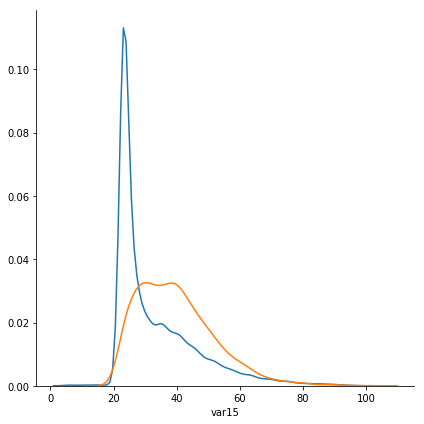

In [121]:
sns.FacetGrid(train, hue='TARGET',size=6).map(sns.kdeplot,'var15')

## Var38

In [13]:
var38_val_counts = train['var38'].value_counts()
var38_val_counts.iloc[:10],len(var38_val_counts)

(117310.979016    14868
 451931.220000       16
 463625.160000       12
 288997.440000       11
 104563.800000       11
 236690.340000        8
 329603.970000        7
 104644.410000        7
 67088.310000         7
 125722.440000        7
 Name: var38, dtype: int64, 57736)

What the heck is 117310.979016? 

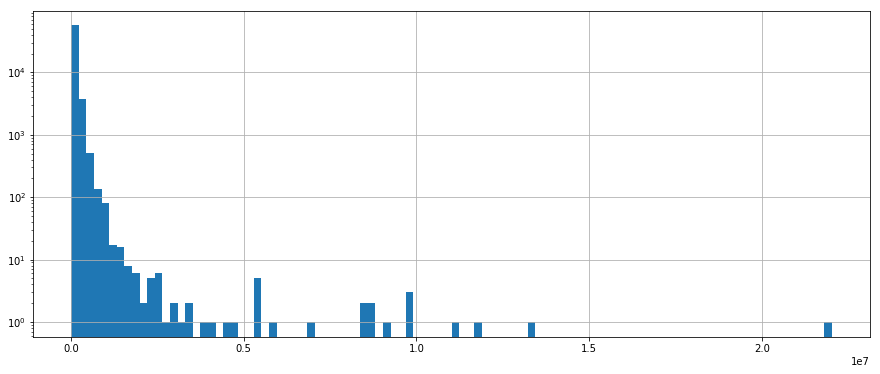

In [23]:
most_common_var38_idx = (train.var38>117310) & (train.var38 < 117311)
train[~most_common_var38_idx].var38.hist(log=True,bins=100)

# alo